<a href="https://colab.research.google.com/github/Ayushmabahuguna/Projects/blob/main/Copy_of_Untitled3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# New section

In [ ]:
import os
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re

# New section

In [ ]:
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
lines=pd.read_csv("/content/Hindi_English_Truncated_Corpus.csv",encoding='utf-8')

In [ ]:
lines.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what needs to be done.,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,ted,"I'd like to tell you about one such child,","मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,indic2012,This percentage is even greater than the percentage in India.,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not paying attention.,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called Upanishad.,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [ ]:
import sys
sys.setdefaultencoding('utf-8')

AttributeError: ignored

# New section

In [ ]:
lines['source'].value_counts()

tides        21565
ted          16972
indic2012    16317
Name: source, dtype: int64

In [ ]:
lines=lines[lines['source']=='ted']

In [ ]:
lines.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what needs to be done.,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,ted,"I'd like to tell you about one such child,","मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
3,ted,what we really mean is that they're bad at not paying attention.,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13,ted,So there is some sort of justice,तो वहाँ न्याय है


In [ ]:
pd.isnull(lines).sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [ ]:
lines=lines[~pd.isnull(lines['english_sentence'])]

In [ ]:
lines.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what needs to be done.,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,ted,"I'd like to tell you about one such child,","मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
3,ted,what we really mean is that they're bad at not paying attention.,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13,ted,So there is some sort of justice,तो वहाँ न्याय है


In [ ]:
lines.drop_duplicates(inplace=True)

In [ ]:
lines['english_sentence'].value_counts().sum()

16522

In [ ]:
lines=lines.sample(n=25000,random_state=42,replace=True)
print(lines)
lines.shape

      source                                                          english_sentence                                                                                hindi_sentence
52438  ted    We're about to take a break in a moment.                                  थोडी ही देर में हम एक छोटा सा मध्यांतर लेंगे।                                               
2816   ted    a series of images captured by some of Pakistan's                         ऐसी तस्वीरें जो कि पाकिस्तान के कुछ                                                         
17904  ted    Shaheen's background I don't even know.                                   शाहीन की पिछली जिंदगी के बारे में मैं जानती तक नहीं हूँ.                                    
39645  ted    my team at Push Pop Press                                                 पुश पॉप प्रेष में मेरी टीम                                                                  
37427  ted    And this is one of the most exciting projects that we're developing,      और सबसे

(25000, 3)

In [ ]:
lines=lines.sample(n=25000,random_state=42)
print(lines)
lines.shape

      source                                                                english_sentence                                               hindi_sentence
33398  ted    of people with wings sitting on clouds                                          बादलों पर बैठे पंखों वाले                                  
51073  ted    that were present less than a billionth of a second after the universe began -  जो उपस्थित थी, संसार की शुरुआत के एक सेकंड के अरब भाग में -
28723  ted    And, as a consequence, the Western view                                         नतीज़ा - अफ़्रीका की आर्थिक समस्याओं                       
32311  ted    People died because of cartoons.                                                लोग कार्टूनों की वजह से मारे गए.                           
545    ted    for countries who do not have access to clean drinking water                    उन देशों के लिए, जिनके पास पीने का साफ़ पानी नहीं है       
...    ...                                                             ...  

(25000, 3)

In [ ]:
lines['english_sentence'].head()

33398    of people with wings sitting on clouds                                        
51073    that were present less than a billionth of a second after the universe began -
28723    And, as a consequence, the Western view                                       
32311    People died because of cartoons.                                              
545      for countries who do not have access to clean drinking water                  
Name: english_sentence, dtype: object

In [ ]:
exclude = set(string.punctuation)
lines['english_sentence']=lines['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
remove_digits = str.maketrans('', '', digits)
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.translate(remove_digits))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.translate(remove_digits))


In [ ]:
lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.strip())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.strip())
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))


In [ ]:
lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x : 'START_ '+ x + ' _END')

In [ ]:
lines.head()

,source,english_sentence,hindi_sentence
33398,ted,of people with wings sitting on clouds,START_ बादलों पर बैठे पंखों वाले _END
51073,ted,that were present less than a billionth of a second after the universe began,START_ जो उपस्थित थी संसार की शुरुआत के एक सेकंड के अरब भाग में _END
28723,ted,And as a consequence the Western view,START_ नतीज़ा अफ़्रीका की आर्थिक समस्याओं _END
32311,ted,People died because of cartoons,START_ लोग कार्टूनों की वजह से मारे गए _END
545,ted,for countries who do not have access to clean drinking water,START_ उन देशों के लिए जिनके पास पीने का साफ़ पानी नहीं है _END


In [ ]:
all_eng_words=set()
for eng in lines['english_sentence']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in lines['hindi_sentence']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)

In [ ]:
len(all_eng_words)

10724

In [ ]:
len(all_hindi_words)

12294

In [ ]:
lines['length_eng_sentence']=lines['english_sentence'].apply(lambda x:len(x.split(" ")))
lines['length_hin_sentence']=lines['hindi_sentence'].apply(lambda x:len(x.split(" ")))

In [ ]:
lines.head(10)

,source,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
33398,ted,of people with wings sitting on clouds,START_ बादलों पर बैठे पंखों वाले _END,7,7
51073,ted,that were present less than a billionth of a second after the universe began,START_ जो उपस्थित थी संसार की शुरुआत के एक सेकंड के अरब भाग में _END,14,15
28723,ted,And as a consequence the Western view,START_ नतीज़ा अफ़्रीका की आर्थिक समस्याओं _END,7,7
32311,ted,People died because of cartoons,START_ लोग कार्टूनों की वजह से मारे गए _END,5,9
545,ted,for countries who do not have access to clean drinking water,START_ उन देशों के लिए जिनके पास पीने का साफ़ पानी नहीं है _END,11,14
7573,ted,All the books from Bait alHikma library,START_ बैतअलहिक्मा पुस्तकालय की सारी किताबें _END,7,7
21650,ted,Im five years old and I am very proud,START_ मैं पांच साल की हूँ और मुझे अपने आप पर गर्व है _END,9,14
19615,ted,in my view are ideas in India,START_ भारत में वह विचार हैं _END,7,7
53401,ted,this flyover where youre eight feet,START_ यह फ्लाईओवर जहाँ आप फीट _END,6,7
16862,ted,what if we view them as the solution,START_ हम क्यों ना इन्हें इस समस्या के समाधान के रूप में देखें _END,8,14


In [ ]:
lines[lines['length_eng_sentence']>30].shape

(0, 5)

In [ ]:
lines=lines[lines['length_eng_sentence']<=20]
lines=lines[lines['length_hin_sentence']<=20]
lines.shape

(24805, 5)

In [ ]:
print("maximum length of Hindi Sentence ",max(lines['length_hin_sentence']))
print("maximum length of English Sentence ",max(lines['length_eng_sentence']))

maximum length of Hindi Sentence  20
maximum length of English Sentence  20


In [ ]:
max_length_src=max(lines['length_hin_sentence'])
max_length_tar=max(lines['length_eng_sentence'])

In [ ]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)+1
num_decoder_tokens = len(all_hindi_words)+1
num_encoder_tokens, num_decoder_tokens

(10725, 12295)

In [ ]:
num_decoder_tokens += 1

In [ ]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])

target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [ ]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [ ]:
lines = shuffle(lines)
lines.head(10)

,source,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
646,ted,are very different and distinct and that I had learned it very well,START_ बहुत अलग और विशिष्ट होते हैं और यह कि मैने वाक्यांश को बहुत अच्छी तरह से सीखा था _END,13,20
29535,ted,I have asked her to translate for me,START_ मैने इसे मेरे लिये अनुवाद करने के लिये कहा हैं। _END,8,12
48517,ted,Bruno Giussani Mark Mark come back,START_ ब्रुनो ज्युसानीBruno Giussani मार्क मार्क वापस आ जाओ _END,6,10
20327,ted,to export goods dutyfree to the European Union market,START_ बिना कर के माल निर्यात का मौका दिया है _END,9,11
2040,ted,Men are restless,START_ आदमी उछ्छंखल होते हैं _END,3,6
11762,ted,the pain of the longing,START_ दर्द है याद का _END,5,6
54643,ted,to encourage you to urge you,START_ आप लोगों को प्रोत्साहित करने के लिए आप से आग्रह करने के लिए _END,6,15
21146,ted,When this happened a part of me thought well,START_ जब यह हुआ तब मैंरे एक हिस्से ने अच्छी तरह से सोचा की _END,9,15
8106,ted,So if we can get the lights,START_ तो ज़रा लाइट्स _END,7,5
239,ted,I made him “The Uncle Phone”,START_ मैंने उन्हें “द अंकल फोन” बना दिया _END,6,9


In [ ]:
X, y = lines['english_sentence'], lines['hindi_sentence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((19844,), (4961,))

In [ ]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
                        yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [ ]:
latent_dim=300

In [ ]:
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens ,latent_dim, mask_zero=True)(encoder_inputs) 
encoder_lstm=LSTM(latent_dim,return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

In [ ]:
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 300)    3217500     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 300)    3688800     input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 50

In [ ]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),steps_per_epoch = train_samples//batch_size,epochs=epochs,validation_data = generate_batch(X_test, y_test, batch_size = batch_size),validation_steps = val_samples//batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
155/155 [==============================] - 39s 251ms/step - loss: 5.6737e-04 - val_loss: 0.0638
Epoch 2/50
155/155 [==============================] - 38s 248ms/step - loss: 0.0011 - val_loss: 0.1848
Epoch 3/50
155/155 [==============================] - 38s 248ms/step - loss: 0.0013 - val_loss: 0.3000
Epoch 4/50
155/155 [==============================] - 39s 250ms/step - loss: 0.0012 - val_loss: 0.4150
Epoch 5/50
155/155 [==============================] - 38s 248ms/step - loss: 0.0015 - val_loss: 0.5563
Epoch 6/50
155/155 [==============================] - 38s 247ms/step - loss: 0.0016 - val_loss: 0.7138
Epoch 7/50
155/155 [==============================] - 39s 249ms/step - loss: 0.0017 - val_loss: 0.8659
Epoch 8/50
155/155 [==============================] - 37s 241ms/step - loss: 0.0048 - val_loss: 1.1027
Epoch 9/50
155/155 [==============================] - 39s 250ms/step - loss: 0.0055 - val_loss: 1.2209
Epoch 10/50
155/155 [==============================] - 39s 249ms/step

In [ ]:
model.save_weights('nmt_weights.h5')

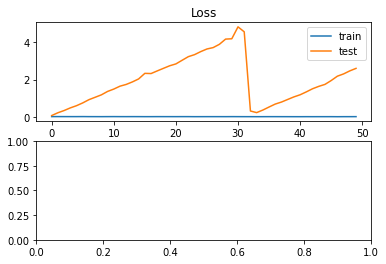

In [ ]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title("Loss")
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.subplot(212)


In [ ]:
yhat_prob=model.predict(X_test,verbose=0)

ValueError: ignored

In [ ]:
train_acc=model.evaluate(encoder_inputs, decoder_inputs,verbose=0)
print(train_acc)

TypeError: ignored

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

ValueError: ignored

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) 
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) 
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [ ]:
k=k+1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


Input English sentence: and showing you some of the designs that we have in nature
Actual Hindi Translation:  मैं आपको हमारी प्रकृति में निहित कुछ संरचनाएँ दिखाऊं 
Predicted Hindi Translation:  मैं आपको हमारी प्रकृति में निहित कुछ संरचनाएँ दि


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: We need to learn for example from Dr Cushing
Actual Hindi Translation:  हमें सीखना चाहिए जैसे की डा कुशीनग से 
Predicted Hindi Translation:  जो जिसका जो सोचना सिखाने है इतनी आसानी से डर लगना 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: actually fear and indifference
Actual Hindi Translation:  असल में डर और उदासीनता के बीच में 
Predicted Hindi Translation:  जो जिसका जो सोचना सिखाने है इतनी आसानी से डर लगना 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

Input English sentence: as well as laugh”
Actual Hindi Translation:  और साथ साथ हसें” 
Predicted Hindi Translation:  जो जिसका जो सोचना सिखाने है इतनी आसानी से डर लगना 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])


Input English sentence: Now theres a book actually about KIPP
Actual Hindi Translation:  एक किताब है के आई पी पी पर 
Predicted Hindi Translation:  जो जिसका जो सोचना सिखाने है इतनी आसानी से डर लगना 
